In [1]:
# import pandas library
import pandas as pd

In [2]:
# import numpy libary
import numpy as np

In [3]:
# import matplotlib for graphing
import matplotlib.pyplot as plt

**1 Instacart Orders Data**

**instacart_orders.csv: each row corresponds to one order on the Instacart app**

- **order_id**: ID number that uniquely identifies each order
- **user_id**: ID number that uniquely identifies each customer account
- **order_number**: the number of times this customer has placed an order
- **order_dow**: day of the week that the order placed (which day is 0 is uncertain)
- **order_hour_of_day**: hour of the day that the order was placed
- **days_since_prior_order**: number of days since this customer placed their previous order

In [4]:
# import csv
df_instacart_orders = pd.read_csv("/datasets/instacart_orders.csv",sep=';')
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


**2 Products Data**

**products.csv:** each row corresponds to a unique product that customers can buy

- **'product_id'**: ID number that uniquely identifies each product
- **'product_name'**: name of the product
- **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
- **'department_id'**: ID number that uniquely identifies each grocery department category

In [5]:
# import csv
df_products = pd.read_csv("/datasets/products.csv",sep=';')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**3 Aisles Data**

**aisles.csv**

- **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
- **'aisle'**: name of the aisle

In [6]:
# import csv
df_aisles = pd.read_csv("/datasets/aisles.csv",sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


**4 Departments Data**

**departments.csv**

- **'department_id'**: ID number that uniquely identifies each grocery department category
- **'department'**: name of the department

In [7]:
# import csv
df_departments = pd.read_csv("/datasets/departments.csv",sep=";")
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**5 Order Products Data**

**order_products.csv**: each row corresponds to one item placed in an order

- **'order_id'**: ID number that uniquely identifies each order
- **'product_id'**: ID number that uniquely identifies each product
- **'add_to_cart_order'**: the sequential order in which each item was placed in the cart
- **'reordered'**: 0 if the customer has never ordered this product before, 1 if they have

In [8]:
# import csv
df_order_products = pd.read_csv("/datasets/order_products.csv",sep=';')
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [9]:
# Check for duplicated orders
dups = df_instacart_orders.duplicated().sum()
print(f"There are {dups} duplicates")

There are 15 duplicates


In [10]:
print(f'Here are the {dups} rows')
df_instacart_orders[df_instacart_orders.duplicated()]

Here are the 15 rows


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


All duplicateds were on a Wednesay and at 2:am

In [11]:
# Check for all orders placed Wednesday at 2:00 AM

In [12]:
df_instacart_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

We can assume 0=sunday, 1=monday,...,6=saturday because 0 means to start and the day of the week starts sundays.

In [13]:
# Make a new column of the days of the week
day_of_week = {0:'sunday',
               1:'monday',
               2:'tuesday',
               3:'wednesday',
               4:'thursday',
               5:'friday',
               6:'saturday'}

df_instacart_orders['day_of_week'] = df_instacart_orders['order_dow'].replace(day_of_week)
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [14]:
hours = sorted([i for i in df_instacart_orders['order_hour_of_day'].unique()])
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


This data follows the 0-23 hour time and not USA Time. So 2:00 am = 2

In [15]:
# orders placed at wednesy at 2:00 am
orders_wed_2am = df_instacart_orders.query("day_of_week == 'wednesday' & order_hour_of_day == 2")
orders_wed_2am.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
4838,2766110,162084,41,3,2,16.0,wednesday
5156,2190225,138285,18,3,2,11.0,wednesday
15506,553049,58599,13,3,2,7.0,wednesday
18420,382357,120200,19,3,2,11.0,wednesday
24691,690242,77357,2,3,2,9.0,wednesday


In [16]:
# Remove duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [17]:
# Double check for duplicate rows
dups = df_instacart_orders.duplicated().sum()
print(f"There are {dups} duplicates")

There are 0 duplicates


In [18]:
# Double check for duplicate order IDs only
df_instacart_orders.shape

(478952, 7)

In [19]:
df_instacart_orders['order_id'].nunique()

478952

Since number of rows match the number of unique rows for the order Id column, there is no duplicates order Id numbers.

In [20]:
# Convert columns to correct data types
df_instacart_orders['day_of_week'] = df_instacart_orders['day_of_week'].astype('category')

In [21]:
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                478952 non-null  int64   
 1   user_id                 478952 non-null  int64   
 2   order_number            478952 non-null  int64   
 3   order_dow               478952 non-null  int64   
 4   order_hour_of_day       478952 non-null  int64   
 5   days_since_prior_order  450135 non-null  float64 
 6   day_of_week             478952 non-null  category
dtypes: category(1), float64(1), int64(5)
memory usage: 22.4 MB


### `products` data frame

In [22]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
# Check for fully duplicate rows
dups = df_products.duplicated().sum()
print(f"There are {dups} full duplicated rows.")

There are 0 full duplicated rows.


In [24]:
# Check for just duplicate product IDs
df_products.shape

(49694, 4)

In [25]:
df_products['product_id'].nunique()

49694

The number of rows equal the number of unique values for the product id column, so no full duplicates in this columns

In [26]:
# Check for just duplicate product names (convert names to lowercase to compare better)
def normalize_lower(col):
    if pd.isna(col):
        return col
    else:
        return col.lower()

In [27]:
df_products["product_name_lower"] = df_products["product_name"].apply(normalize_lower)
df_products.head()

,product_id,product_name,aisle_id,department_id,product_name_lower
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [28]:
# Check if there are duplicates in the product name lower column
product_lower = df_products['product_name_lower'].value_counts(ascending = False)
product_lower[product_lower>1]

green tea with ginseng and honey             3
cream of tartar                              2
cosmic brownies with chocolate chip candy    2
skinless & boneless sardines in olive oil    2
lavender & chamomile baby powder             2
                                            ..
high performance energy drink                2
balsamic vinegar of modena                   2
salsa medium                                 2
bag of oranges                               2
chunk light tuna in water                    2
Name: product_name_lower, Length: 103, dtype: int64

There are 103 product names that have more than 1 repeated product names. We we drop them.

In [29]:
# Count how many duplicates for the new product name column
dups = df_products['product_name_lower'].duplicated().sum()
print(f"There are {dups} duplicated rows with the lowercase column product name")

There are 1361 duplicated rows with the lowercase column product name


In [30]:
# To make sure these are true duplicates, we need to include the other columns
# Some products could have same name but different aisles/department
cols = ['aisle_id','department_id','product_name_lower']
dups = df_products[cols].duplicated().sum()
print(f"There are {dups} duplicated rows with the lowercase column product name.(including the other cols)")

There are 1344 duplicated rows with the lowercase column product name.(including the other cols)


It means after we made them lowercase, there were items that shared different differet aisle id and department id

In [31]:
df_products = df_products.drop_duplicates(subset=cols).reset_index(drop=True)
df_products.shape

(48350, 5)

In [32]:
# Check for duplicate product names that aren't missing
df_products[df_products['product_name_lower'].notna()].duplicated().sum()

0

In [33]:
# checking for more duplicates
def normalize_other(col):
    '''This function will check for strong conditions'''
    if pd.isna(col):
        return col
    else:
        col = col.lower() # make all lowercase
        col = col.strip() # strip the white spaces
        col = " ".join( col.split() ) # erase the extra white spaces in between
        col = col.replace('-','') # remove -
        col = col.replace(' ','') # make one word 
        return col

In [34]:
df_products["product_name_lower_2"] = df_products["product_name_lower"].apply(normalize_other)
df_products.head()

,product_id,product_name,aisle_id,department_id,product_name_lower,product_name_lower_2
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,chocolatesandwichcookies
1,2,All-Seasons Salt,104,13,all-seasons salt,allseasonssalt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea,robustgoldenunsweetenedoolongtea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce,greenchileanytimesauce


In [35]:
cols2 = ['aisle_id','department_id','product_name_lower_2']
dups = df_products[cols2].duplicated().sum()
print(f"There are {dups} more duplicated rows.")

There are 256 more duplicated rows.


In [36]:
df_products = df_products.drop_duplicates(subset=cols2).reset_index(drop=True)
df_products.shape

(48094, 6)

In [37]:
# Convert df back to its orignal columns
df_products = df_products[["product_id","product_name","aisle_id"]]
df_products.head()

,product_id,product_name,aisle_id
0,1,Chocolate Sandwich Cookies,61
1,2,All-Seasons Salt,104
2,3,Robust Golden Unsweetened Oolong Tea,94
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38
4,5,Green Chile Anytime Sauce,5


In [38]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48094 entries, 0 to 48093
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    48094 non-null  int64 
 1   product_name  48093 non-null  object
 2   aisle_id      48094 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


### `departments` data frame

In [39]:
df_departments['department'] = df_departments['department'].astype('category')

In [40]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     category
dtypes: category(1), int64(1)
memory usage: 1.0 KB


In [41]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### `aisles` data frame

In [42]:
df_aisles['aisle'] = df_aisles['aisle'].astype('category')

In [43]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int64   
 1   aisle     134 non-null    category
dtypes: category(1), int64(1)
memory usage: 6.6 KB


In [44]:
# Check for duplicates
df_aisles['aisle'].duplicated().sum()
df_aisles.duplicated().sum()

0

### `order_products` data frame

In [45]:
df_order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [46]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [47]:
# Check for fullly duplicate rows
dups = df_order_products.duplicated().sum()
print(f"The are {dups} fully duplicated rows")

The are 0 fully duplicated rows


In [48]:
# Double check for any other tricky duplicates

It is ok for values in the same column to repeat because:

1.) order_id: If order_id is shown more than once, then there was other items brought in the same order
2.) product_id: you can buy the same product for the same order id
3.) reorded: its ok for this column to repeat.

## Find and remove missing values


### `products` data frame

In [49]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48094 entries, 0 to 48093
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    48094 non-null  int64 
 1   product_name  48093 non-null  object
 2   aisle_id      48094 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [50]:
df_products.isna().sum()

product_id      0
product_name    1
aisle_id        0
dtype: int64

In [51]:
# Are all of the missing product names associated with aisle ID 100?
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id
37,38,NaN,100


The missing value for product name is assoicated with aisle id # 100

In [52]:
# Are all of the missing product names associated with department ID 21?

df_departments.sort_values(by='department')

,department_id,department
4,5,alcohol
17,18,babies
2,3,bakery
6,7,beverages
13,14,breakfast
9,10,bulk
14,15,canned goods
15,16,dairy eggs
19,20,deli
8,9,dry goods pasta


The is only a missing department for department id # 21.

In [53]:
# What is this ailse and department?
df_aisles.query('aisle_id == 100')

,aisle_id,aisle
99,100,missing


The aisle is missing with aisle id of 100 and the department is missing with department id of 21

In [54]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products.loc[37]

product_id           38
product_name    Unknown
aisle_id            100
Name: 37, dtype: object

### `orders` data frame

In [55]:
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                478952 non-null  int64   
 1   user_id                 478952 non-null  int64   
 2   order_number            478952 non-null  int64   
 3   order_dow               478952 non-null  int64   
 4   order_hour_of_day       478952 non-null  int64   
 5   days_since_prior_order  450135 non-null  float64 
 6   day_of_week             478952 non-null  category
dtypes: category(1), float64(1), int64(5)
memory usage: 22.4 MB


In [56]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [57]:
# Are there any missing values where it's not a customer's first order?
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [58]:
df_merge = df_instacart_orders.merge(df_order_products,
                    how='inner',
                    on='order_id',
                    suffixes=['_df_instacart_orders','_df_order_products'])

df_merge.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,saturday,19048,1.0,1
1,1515936,183418,11,6,13,30.0,saturday,47766,3.0,1
2,1515936,183418,11,6,13,30.0,saturday,45066,9.0,0
3,1515936,183418,11,6,13,30.0,saturday,24082,11.0,0
4,1515936,183418,11,6,13,30.0,saturday,24363,4.0,0


In [59]:
# filter not first timers
df_merge.query("reordered==1").isna().sum()

order_id                    0
user_id                     0
order_number                0
order_dow                   0
order_hour_of_day           0
days_since_prior_order      0
day_of_week                 0
product_id                  0
add_to_cart_order         319
reordered                   0
dtype: int64

There are 319 missing values in the add_to_cart_order column.

Data is too complex to determine how to fill in these missing values.

Will leave them missing for now.

### `order_products` data frame

In [60]:
df_order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [61]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [62]:
# What are the min and max values in this column?
col = "add_to_cart_order"
min1 = df_order_products['add_to_cart_order'].min()
max1 = df_order_products['add_to_cart_order'].max()
print(f"The min value for the {col} column is {min1}.)")
print(f"The max value for the {col} column is {max1}.)")

The min value for the add_to_cart_order column is 1.0.)
The max value for the add_to_cart_order column is 64.0.)


In [63]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids = list(df_order_products.query("@pd.isna(add_to_cart_order)")['order_id'].unique())
df = df_order_products.query("order_id in @order_ids")
df.head()

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0


In [64]:
df.query("@pd.isna(add_to_cart_order)")

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [65]:
df.query("add_to_cart_order==64")

,order_id,product_id,add_to_cart_order,reordered
76044,1386261,31847,64.0,0
154176,854647,22922,64.0,0
177733,3383594,7970,64.0,0
213282,2470674,30257,64.0,0
233518,1968313,495,64.0,1
...,...,...,...,...
4148751,2999801,24722,64.0,1
4235552,3308010,3888,64.0,1
4409436,747668,31268,64.0,0
4419785,1633337,34,64.0,0


In [66]:
# Do all orders with missing values have more than 64 products?
df.groupby('order_id').count()

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


In [67]:
df.groupby('order_id').size()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

We can see the count method counts non null values where the size method includes the null values. This could mean that orders passing 64 were null values

In [68]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [69]:
order_hour_of_day = sorted(list(df_instacart_orders['order_hour_of_day'].unique()))
order_hour_of_day

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [70]:
order_dow = sorted(list(df_instacart_orders['order_dow'].unique()))
order_dow

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

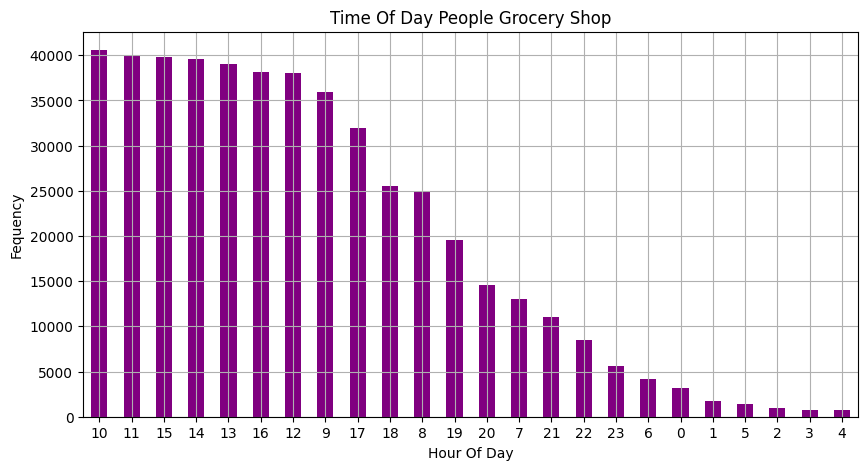

In [71]:
df_instacart_orders["order_hour_of_day"].value_counts().plot(kind="bar",
                                                             rot=0,
                                                             xlabel="Hour Of Day",
                                                             ylabel="Fequency",
                                                             title="Time Of Day People Grocery Shop",
                                                             figsize=[10,5],
                                                             grid=True,
                                                             color='purple')
plt.show()

### [A3] What day of the week do people shop for groceries?

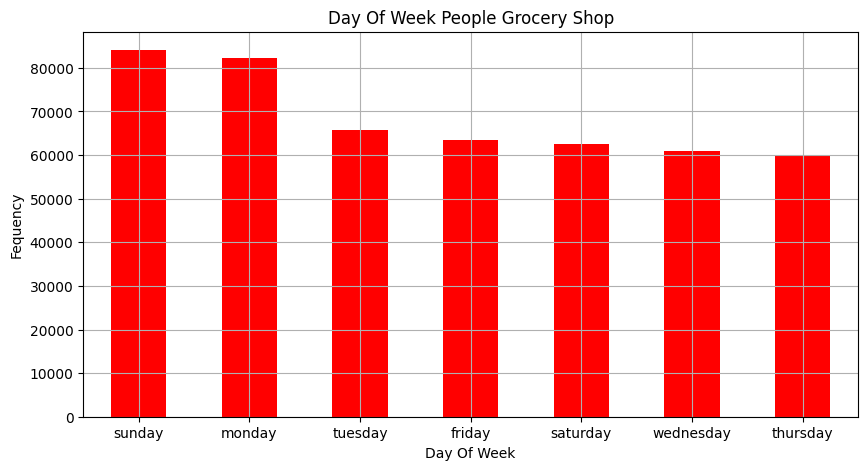

In [72]:
df_instacart_orders["day_of_week"].value_counts().plot(kind="bar",
                                                             rot=0,
                                                             xlabel="Day Of Week",
                                                             ylabel="Fequency",
                                                             title="Day Of Week People Grocery Shop",
                                                             figsize=[10,5],
                                                             grid=True,
                                                             color='red')
plt.show()

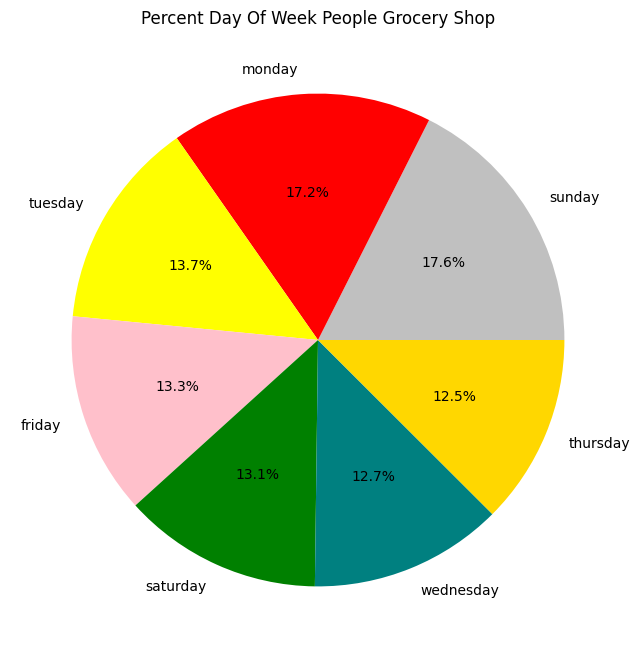

In [73]:
df_instacart_orders["day_of_week"].value_counts().plot(kind="pie",
                                                       autopct="%1.1f%%",
                                                       figsize=[70,8],
                                                       title="Percent Day Of Week People Grocery Shop",
                                                       ylabel='',
                                                       colors=['silver','red','yellow','pink','green','teal','gold'])
                                                       

plt.show()

### [A4] How long do people wait until placing another order?

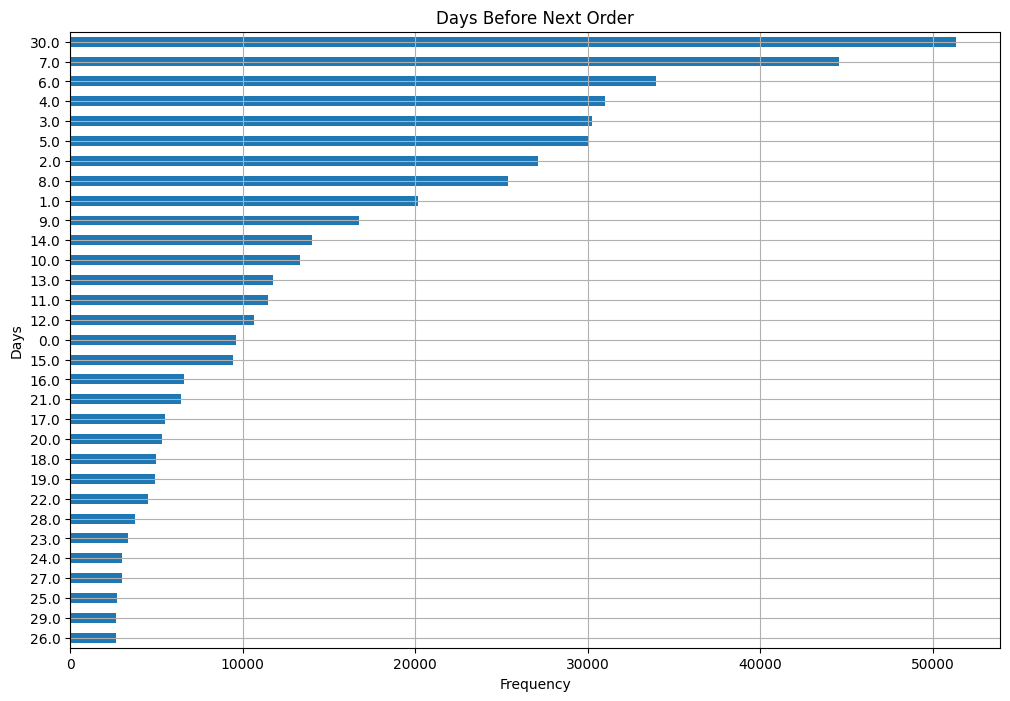

In [74]:
df_instacart_orders['days_since_prior_order'].value_counts(ascending=True).plot(kind='barh',
                                                                                figsize=[12,8],
                                                                                ylabel = 'Days',
                                                                                xlabel = "Frequency",
                                                                                title = "Days Before Next Order",
                                                                                grid = True)
plt.xlabel('Frequency')
plt.ylabel('Days')
plt.show()

In [75]:
mean_days = df_instacart_orders['days_since_prior_order'].mean()
sd_days = df_instacart_orders['days_since_prior_order'].std(ddof=1)
print(f"On avergae, people wait about {mean_days:.0f} before placing another order.")
print(f"It is expected that a person waits between {mean_days-sd_days:.0f} to {mean_days+sd_days:.0f} days until placing the next order.")

On avergae, people wait about 11 before placing another order.
It is expected that a person waits between 2 to 20 days until placing the next order.


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [76]:
def histogram_info(data, bin_size=10, minx = None,r=None ):
    '''
    r = rounding for width
    minx = custum min value
    bin_size = bin size
    data = data as a series
    '''
    print('will return bins,midpoints, and labels for intervals')
    
    # find min and max
    if minx == None:
        minx = min(data)
    else:
        pass
    maxy = max(data)
    n = len(data)
    width = np.ceil( (maxy - minx) / bin_size)
    if r == None:
        pass
    else:
        width = round( (maxy - minx) / bin_size,r)
    bins = [i for i in np.arange(minx,maxy+1,width)]
    
    while max(bins) < maxy:
        bins.append(max(bins)+width)
        
    midpoints = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    labels = [ f"[{bins[i]},{bins[i+1]})" for i in range(len(bins)-1)]
    labels[-1] = labels[-1][:-1] + "]"
    

    print(f'size:{n}')
    print(f'min:{minx}')
    print(f'max:{maxy}')
    print(f'bin size:{bin_size}')
    print(f'width:{width}')
    return bins,midpoints,labels    

In [77]:
# distrubtion for saturday
saturdays = df_instacart_orders.query("day_of_week=='saturday'")['order_hour_of_day']
# distrubtion for wednesday
wednesdays = df_instacart_orders.query("day_of_week=='wednesday'")['order_hour_of_day']

In [78]:
bins,midpoints,labels =histogram_info(saturdays)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:62649
min:0
max:23
bin size:10
width:3.0


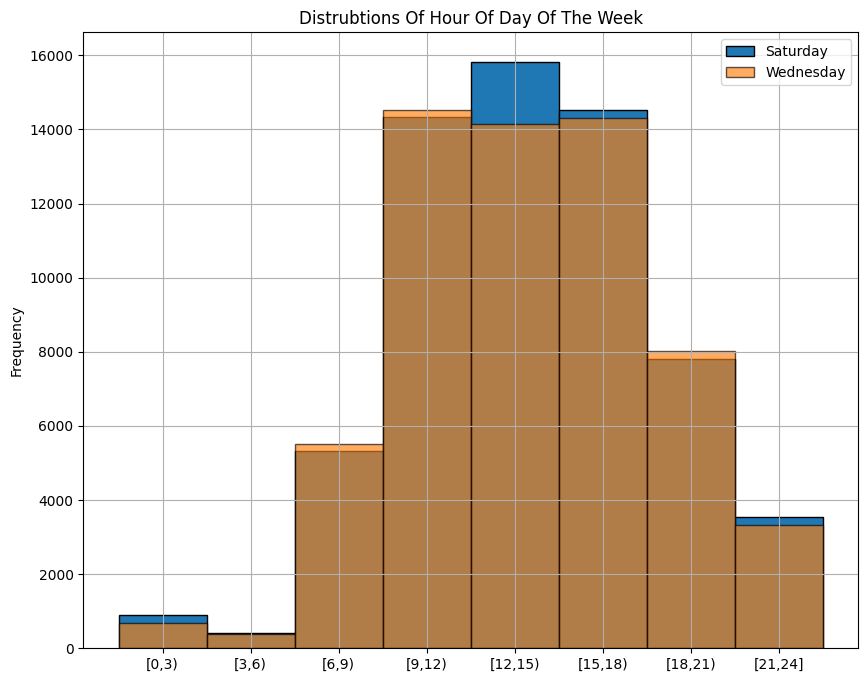

In [79]:
saturdays.plot(kind="hist",
               grid=True,
               xlabel='Hour Of Day',
               title='Distrubtions Of Hour Of Day Of The Week',
               figsize=[10,8],
               edgecolor='black',
               bins = bins)
plt.xticks(midpoints,labels)

wednesdays.plot(kind="hist",
                alpha=0.65,
                edgecolor='black',
                bins = bins)

plt.legend(['Saturday','Wednesday'])
plt.grid(True)
plt.show()

There doesn't seem to be a difference in the order hour of day  distributions on Wednesdays and Saturdays.They appear to have the same shape. The majority of time people shop using instacart on Saturday and and Wednesdays are between the hours from 09:00 to 17:00.

### [B2] What's the distribution for the number of orders per customer?

In [80]:
bins,midpoints,labels = histogram_info(df_instacart_orders.groupby('user_id')['order_number'].max(),bin_size=5)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:157437
min:1
max:100
bin size:5
width:20.0


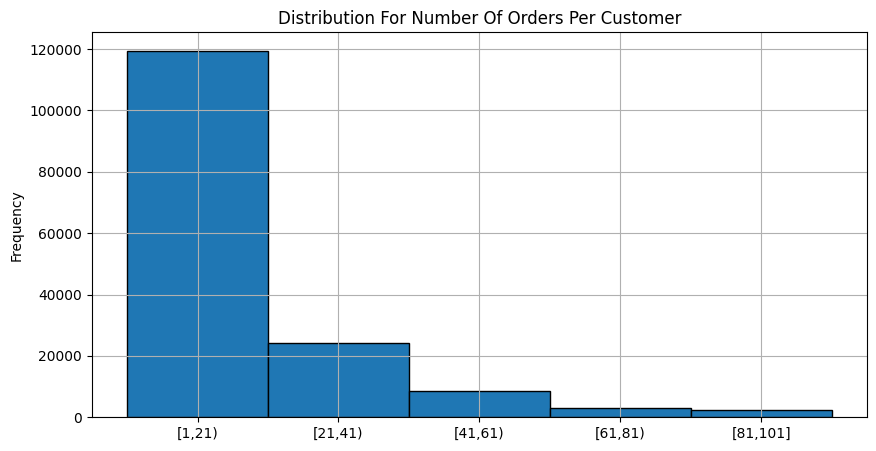

In [81]:
df_instacart_orders.groupby('user_id')['order_number'].max().plot(kind='hist',
                                                                  edgecolor='black',
                                                                 figsize = [10,5],
                                                                 title='Distribution For Number Of Orders Per Customer',
                                                                 xlabel = 'Number Of Orders',
                                                                  grid = True,
                                                                  bins=bins)


plt.xticks(midpoints,labels)
plt.show()

The distribution for the number of orders per customer is highly skewed to the right, meaning a lot of instacart  customers have not made a high volume of orders. The majority of people have made between 1-20 orders. 

### [B3] What are the top 20 popular products (display their id and name)?

In [82]:
df_products.head()

,product_id,product_name,aisle_id
0,1,Chocolate Sandwich Cookies,61
1,2,All-Seasons Salt,104
2,3,Robust Golden Unsweetened Oolong Tea,94
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38
4,5,Green Chile Anytime Sauce,5


In [83]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [84]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [85]:
df_merge1 = df_instacart_orders.merge(df_order_products,on='order_id',how='inner')
df_merge1.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,saturday,19048,1,1
1,1515936,183418,11,6,13,30.0,saturday,47766,3,1
2,1515936,183418,11,6,13,30.0,saturday,45066,9,0
3,1515936,183418,11,6,13,30.0,saturday,24082,11,0
4,1515936,183418,11,6,13,30.0,saturday,24363,4,0


In [86]:
df_merge2 = df_merge1.merge(df_products,on='product_id',how='inner')
cols = ['order_id','user_id','product_name','product_id']
df_clean = df_merge2[cols]
df_clean.head()

,order_id,user_id,product_name,product_id
0,1515936,183418,Organic Butternut Squash,19048
1,787445,25685,Organic Butternut Squash,19048
2,1646929,205815,Organic Butternut Squash,19048
3,276490,1004,Organic Butternut Squash,19048
4,1300214,33481,Organic Butternut Squash,19048


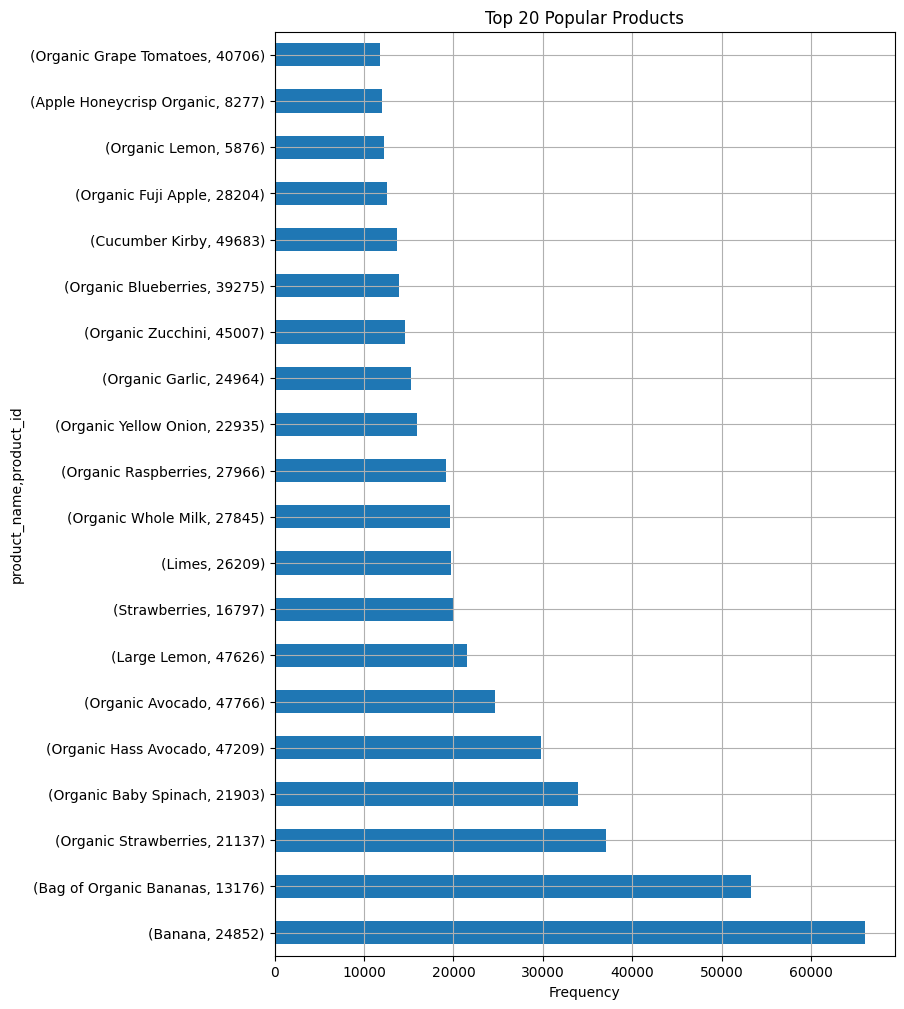

In [87]:
df_clean_grouped = df_clean.groupby(['product_name','product_id']).agg(freq=('user_id','count')).sort_values(by='freq',ascending=False)
df_clean_grouped.head(20).plot(kind='barh',
                               figsize=[8,12],
                               grid=True,
                               ylabel ='Product Name & ID',
                               title = 'Top 20 Popular Products',
                               legend = False)

plt.xlabel('Frequency')
plt.show()

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [88]:
df_clean = df_order_products.groupby('order_id').agg(freq=('product_id','count'))
df_clean.head()

,freq
order_id,
4,13
9,15
11,5
19,3
20,8


In [89]:
bins,midpoints,labels = histogram_info(df_clean['freq'],bin_size=10)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:450046
min:1
max:127
bin size:10
width:13.0


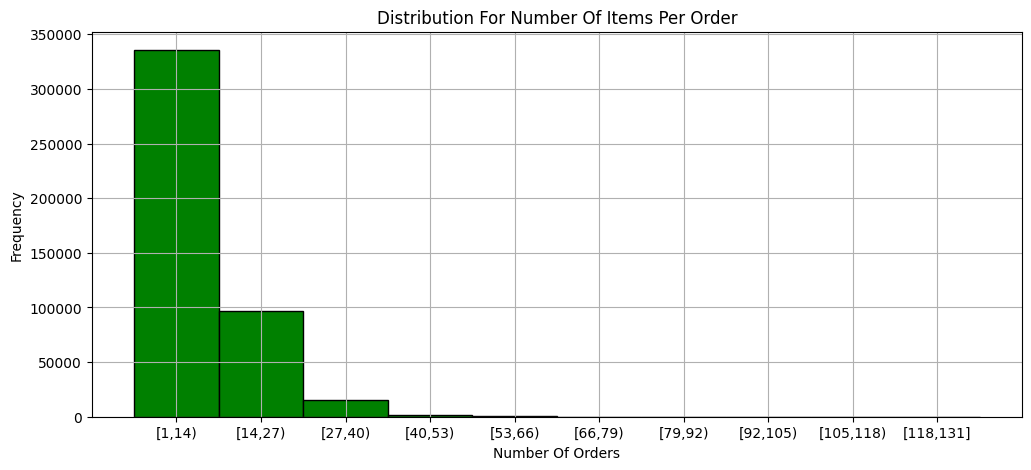

In [90]:
df_clean['freq'].plot(kind='hist',
                      edgecolor='black',
                      figsize = [12,5],
                      title='Distribution For Number Of Items Per Order',
                      xlabel = 'Number Of Orders',
                      grid = True,
                      bins=bins,
                      color='green')

plt.xticks(midpoints,labels)
plt.xlabel('Number Of Orders')
plt.show()

The distribution for number of items per order is highly skewd to the left. The majority of customers make purchase between 1 to 13 items per order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [91]:
df_reordered = df_order_products.query("reordered ==1")
df_reordered.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [92]:
# Indices of the top 20  most reordered items in order
index_top20 = list(df_reordered['product_id'].value_counts(ascending = False).head(20).index)

In [93]:
cols = ['product_name','product_id']
# make sure its in order
top20 = df_products.query("product_id in @index_top20")[cols].set_index("product_id").loc[index_top20].reset_index()
print('Top 20 items that are reordered most frequently ')
top20

Top 20 items that are reordered most frequently 


,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [94]:
proportion_product_reorder = df_order_products.groupby('product_id').agg(proportion_product_reorders = ('reordered','mean'))*100
proportion_product_reorder.head()

,proportion_product_reorders
product_id,
1,56.428571
2,0.000000
3,73.809524
4,51.020408
7,50.000000


In [95]:
# Merge the products df with the new proportion df to get the names and 
proportion_product_reorder = proportion_product_reorder.merge(df_products,how="inner",on="product_id")

# Get the most important columns 
cols = ['product_id','product_name','proportion_product_reorders']
proportion_product_reorder = proportion_product_reorder[cols]
proportion_product_reorder.head()

,product_id,product_name,proportion_product_reorders
0,1,Chocolate Sandwich Cookies,56.428571
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,73.809524
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,51.020408
4,7,Pure Coconut Water With Orange,50.000000


In [96]:
# clean the proportion_product_reorders column
proportion_product_reorder['proportion_product_reorders'] = proportion_product_reorder['proportion_product_reorders'].apply(lambda x: str(round(x,2))+"%" )
proportion_product_reorder.head()

,product_id,product_name,proportion_product_reorders
0,1,Chocolate Sandwich Cookies,56.43%
1,2,All-Seasons Salt,0.0%
2,3,Robust Golden Unsweetened Oolong Tea,73.81%
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,51.02%
4,7,Pure Coconut Water With Orange,50.0%


### [C4] For each customer, what proportion of their products ordered are reorders?

In [97]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [98]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [99]:
df_merge = df_order_products.merge(df_instacart_orders,on="order_id",how="inner")
df_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,2141543,11440,17,0,58454,25,0,15,8.0,sunday
1,2141543,31869,15,1,58454,25,0,15,8.0,sunday
2,2141543,30233,9,1,58454,25,0,15,8.0,sunday
3,2141543,27966,20,1,58454,25,0,15,8.0,sunday
4,2141543,13176,2,1,58454,25,0,15,8.0,sunday


In [100]:
proportion_users_reorder = df_merge.groupby('user_id').agg(proportion_user_reorders = ('reordered','mean'))*100
proportion_users_reorder.head()

,proportion_user_reorders
user_id,
2,3.846154
4,0.000000
5,66.666667
6,0.000000
7,92.857143


In [101]:
# clean the proportion user reorders col
proportion_users_reorder['proportion_user_reorders'] = proportion_users_reorder['proportion_user_reorders'].apply(lambda x: str(round(x,2))+"%")
proportion_users_reorder.head()

,proportion_user_reorders
user_id,
2,3.85%
4,0.0%
5,66.67%
6,0.0%
7,92.86%


### [C5] What are the top 20 items that people put in their carts first? 

In [102]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [103]:
df_products.head()

,product_id,product_name,aisle_id
0,1,Chocolate Sandwich Cookies,61
1,2,All-Seasons Salt,104
2,3,Robust Golden Unsweetened Oolong Tea,94
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38
4,5,Green Chile Anytime Sauce,5


In [104]:
# Filter only products that are 1st
df_first = df_order_products.query("add_to_cart_order==1")

top20_1st_products = df_first['product_id'].value_counts().head(20).reset_index().rename(columns = {'index':'product_id','product_id':'Freq'})
top20_1st_products.head()

,product_id,Freq
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390


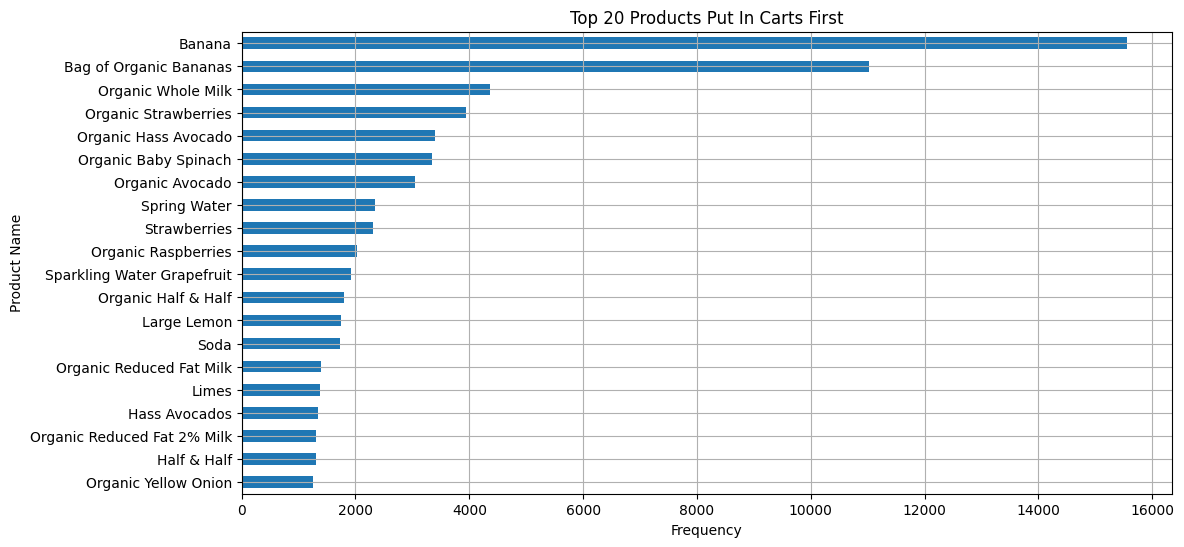

In [105]:
top20_1st_products_merge = top20_1st_products.merge(df_products,on='product_id')[['product_name','Freq']].set_index('product_name').sort_values('Freq')

# Plot
top20_1st_products_merge.plot(kind='barh',
                              xlabel = 'Product Name',
                              ylabel = 'Frequency',
                              title = 'Top 20 Products Put In Carts First',
                              figsize=[12,6],
                              legend=False,
                              grid = True)


plt.xlabel('Frequency')
plt.show()